# California Housing dataset

The target variable is the median house value for California districts, expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people).

A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.

* https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

# LIBRARIES

In [43]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
import pickle

from sklearn.datasets import fetch_california_housing
from sklearn.pipeline import make_pipeline

# LOAD DATA

In [3]:
X,y = fetch_california_housing(as_frame=True,return_X_y=True)

In [4]:
housing_df = pd.concat([X,y],axis=1)

In [5]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [6]:
housing_df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


# PROFILE DATA

In [7]:
housing_df.shape

(20640, 9)

In [8]:
housing_df.describe(include="all")

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [9]:
housing_df.dtypes

MedInc         float64
HouseAge       float64
AveRooms       float64
AveBedrms      float64
Population     float64
AveOccup       float64
Latitude       float64
Longitude      float64
MedHouseVal    float64
dtype: object

# CLEANSE DATA

In [10]:
# no changes

# PROBLEM STATEMENT

Do we need this? why not.

* What factors drive the increase or decrease of housing prices?

# ANALYTICS PROBLEM
* Does house build matter?
* Does house popularity matter?
* Does location matter?

# EXPLORATORY DATA ANALYSIS

## Univariate e.g. distributions

In [11]:
for i in housing_df.columns:
    display(i)
    temp_df = pd.DataFrame(np.histogram(housing_df[i])).T
    temp_df.columns = ['counts','bins']
    display(temp_df)
    print("")

'MedInc'

,counts,bins
0,2247.0,0.49990
1,7436.0,1.94992
2,6098.0,3.39994
3,2990.0,4.84996
4,1060.0,6.29998
5,428.0,7.75000
6,178.0,9.20002
7,93.0,10.65004
8,47.0,12.10006
9,63.0,13.55008


'HouseAge'

,counts,bins
0,719.0,1.0
1,1104.0,6.1
2,2235.0,11.2
3,2681.0,16.3
4,2510.0,21.4
5,2354.0,26.5
6,3555.0,31.6
7,1900.0,36.7
8,1616.0,41.8
9,1966.0,46.9


'AveRooms'

,counts,bins
0,20531.0,0.846154
1,82.0,14.952448
2,17.0,29.058741
3,5.0,43.165035
4,3.0,57.271329
5,0.0,71.377622
6,0.0,85.483916
7,0.0,99.590210
8,0.0,113.696503
9,2.0,127.802797


'AveBedrms'

,counts,bins
0,20563.0,0.333333
1,58.0,3.706667
2,12.0,7.080000
3,3.0,10.453333
4,2.0,13.826667
5,0.0,17.200000
6,0.0,20.573333
7,1.0,23.946667
8,0.0,27.320000
9,1.0,30.693333


'Population'

,counts,bins
0,19816.0,3.0
1,711.0,3570.9
2,95.0,7138.8
3,12.0,10706.7
4,4.0,14274.6
5,0.0,17842.5
6,0.0,21410.4
7,0.0,24978.3
8,1.0,28546.2
9,1.0,32114.1


'AveOccup'

,counts,bins
0,20636.0,0.692308
1,1.0,124.956410
2,0.0,249.220513
3,0.0,373.484615
4,2.0,497.748718
5,0.0,622.012821
6,0.0,746.276923
7,0.0,870.541026
8,0.0,994.805128
9,1.0,1119.069231


'Latitude'

,counts,bins
0,1796.0,32.540
1,8987.0,33.481
2,747.0,34.422
3,474.0,35.363
4,1292.0,36.304
5,4712.0,37.245
6,1740.0,38.186
7,490.0,39.127
8,324.0,40.068
9,78.0,41.009


'Longitude'

,counts,bins
0,190.0,-124.350
1,1553.0,-123.346
2,4564.0,-122.342
3,1673.0,-121.338
4,1098.0,-120.334
5,2887.0,-119.330
6,6208.0,-118.326
7,2252.0,-117.322
8,183.0,-116.318
9,32.0,-115.314


'MedHouseVal'

,counts,bins
0,877.0,0.149990
1,3612.0,0.634992
2,4099.0,1.119994
3,3771.0,1.604996
4,2799.0,2.089998
5,1769.0,2.575000
6,1239.0,3.060002
7,752.0,3.545004
8,479.0,4.030006
9,1243.0,4.515008


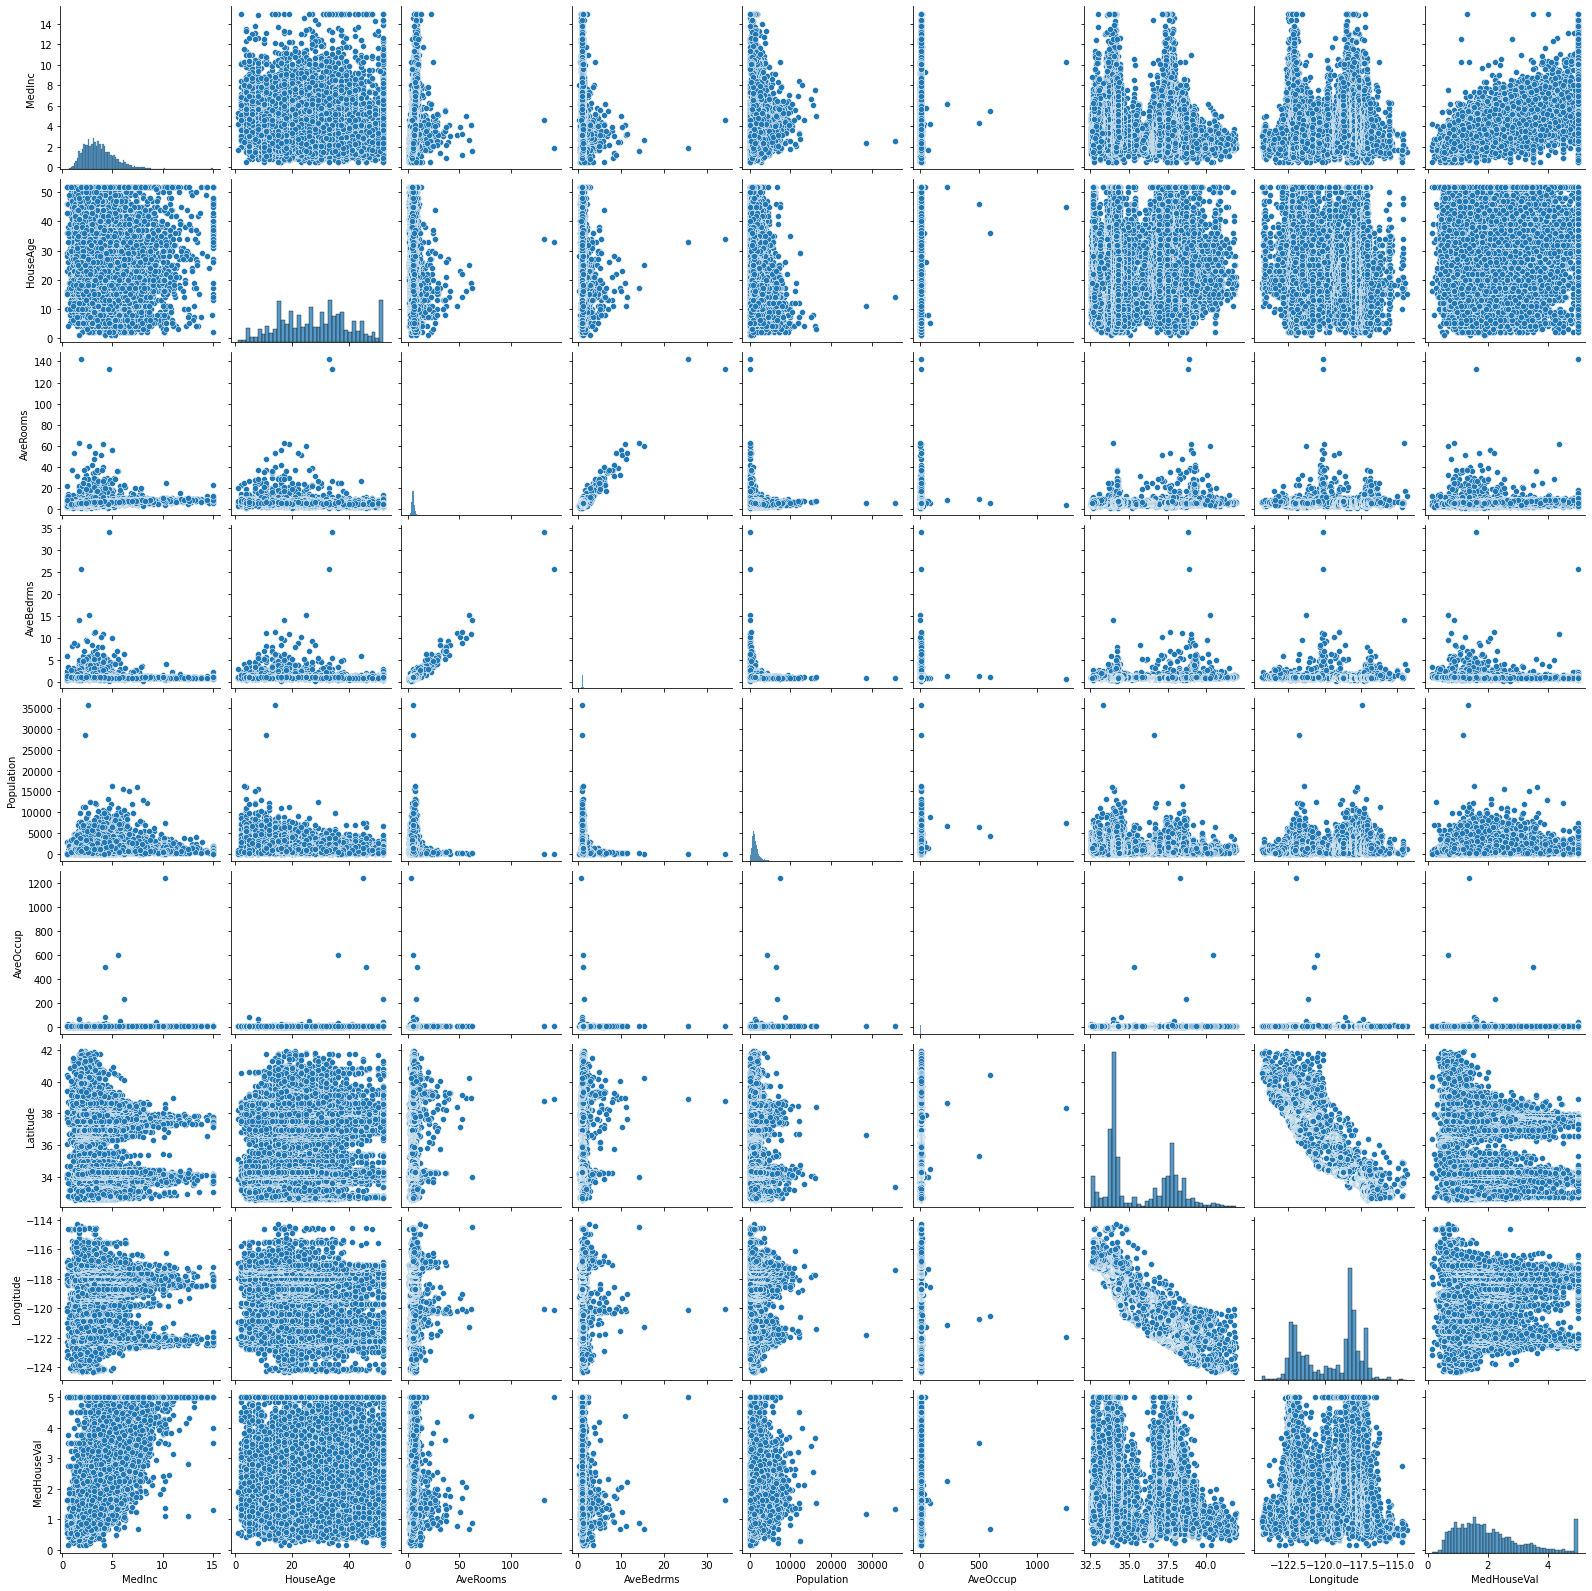

In [12]:
sns.pairplot(housing_df)

## Bivariate / Multivariate e.g. relationships

In [13]:
housing_df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<AxesSubplot:>

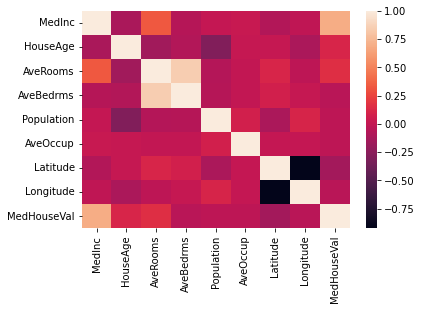

In [14]:
sns.heatmap(housing_df.corr())

# INITIAL INSIGHTS

* MedInc has the highest positive correlation to MedHouseVal
* Latitude has a negative MedhouseVal relationship, which implies that the farther north the house is, the lesser the value.
* AveBedrms, POpulation, AveOccuppancy, Longitude, have marginal impact to medhouseval


# OBJECTIVES

* What features are predictive towards the house value target?
* Are there particular groupings or clusters of house?
* Are there any houses that are outliers or anomalies?

---
# REGRESSION

# BASE MODEL

In [15]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [16]:
pipe = make_pipeline(StandardScaler(),LinearRegression())

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

In [17]:
print("r2_score: %f"%r2_score(y_test,y_pred))
print("mean_squared_error: %f"%mean_squared_error(y_test,y_pred))

r2_score: 0.597049
mean_squared_error: 0.536969


# RECURSIVE FEATURE SELECTION

In [18]:
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=7, step=5)
selector = selector.fit(X_train, y_train)

# RFE reports recommended features
pd.DataFrame({"names":X.columns,"include?":selector.support_,"ranking":selector.ranking_})

,names,include?,ranking
0,MedInc,True,1
1,HouseAge,True,1
2,AveRooms,True,1
3,AveBedrms,True,1
4,Population,False,2
5,AveOccup,True,1
6,Latitude,True,1
7,Longitude,True,1


In [19]:
X.columns[selector.support_]

Index(['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'AveOccup', 'Latitude',
       'Longitude'],
      dtype='object')

In [20]:
X_train[X.columns[selector.support_]]

,MedInc,HouseAge,AveRooms,AveBedrms,AveOccup,Latitude,Longitude
5088,0.9809,19.0,3.187726,1.129964,2.620939,33.98,-118.28
17096,4.2232,33.0,6.189696,1.086651,2.377049,37.46,-122.23
5617,3.5488,42.0,4.821577,1.095436,4.331950,33.79,-118.26
20060,1.6469,24.0,4.274194,1.048387,4.532258,35.87,-119.26
895,3.9909,14.0,4.608303,1.089350,2.471119,37.54,-121.96
...,...,...,...,...,...,...,...
11284,6.3700,35.0,6.129032,0.926267,3.032258,33.78,-117.96
11964,3.0500,33.0,6.868597,1.269488,3.904232,34.02,-117.43
5390,2.9344,36.0,3.986717,1.079696,3.332068,34.03,-118.38
860,5.7192,15.0,6.395349,1.067979,3.178891,37.58,-121.96


In [21]:
pipe1 = make_pipeline(StandardScaler(),LinearRegression())

pipe1.fit(X_train[X.columns[selector.support_]],y_train)

y_pred1 = pipe1.predict(X_test[X.columns[selector.support_]])

In [22]:
print("r2_score: %f"%r2_score(y_test,y_pred1))
print("mean_squared_error: %f"%mean_squared_error(y_test,y_pred1))

r2_score: 0.597048
mean_squared_error: 0.536971


* using all features allows to achieve highest accuracy

# MODEL SELECTION

In [23]:
models = [LinearRegression(),RandomForestRegressor(),LinearSVR()] #create list of models

pipes = [make_pipeline(StandardScaler(),i) for i in models] #lookup: comprehensions

predictions = [] # create list of predictions
for i,x in enumerate(pipes):
    x.fit(X_train,y_train)
    predictions.append(x.predict(X_test))

d:\Users\mogbinar\Anaconda3\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [24]:
def score_model(y_test,y_pred):
    return ("r2_score: %f"%r2_score(y_test,y_pred)), ("mean_squared_error: %f"%mean_squared_error(y_test,y_pred))
    
[score_model(y_test,i) for i in predictions]

[('r2_score: 0.597049', 'mean_squared_error: 0.536969'),
 ('r2_score: 0.805797', 'mean_squared_error: 0.258793'),
 ('r2_score: 0.571082', 'mean_squared_error: 0.571573')]

* Random Forest with default hyperparameters using standardscaler on all features achieve r^2 of 80.4%

---
# CLUSTERING

# ELBOW METHOD

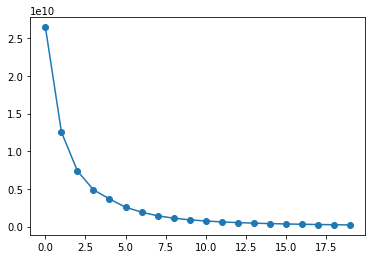

In [25]:
# get the sum of squared errors and find where the reduction of the errors are saturated with the increase of k
squared_errors = []

for num_iter in range(1,21):
    km = KMeans(n_clusters=num_iter, random_state=42)
    km.fit(X)
    squared_errors.append(km.inertia_)

# check for the best k to use
plt.plot(squared_errors, marker = 'o')

In [26]:
# Clustering using KMeans. We choose 5 clusters
km = KMeans(n_clusters=3, random_state=42)

# Fit data to model
km.fit(X)

# Get labels
labels = km.predict(X)

# Create new dataframe with features and labels
new_data = X.copy()

# Add labels to new_data dataframe
housing_df['labels'] = labels

<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

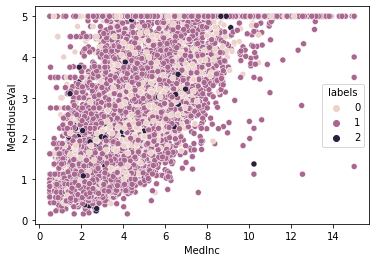

In [27]:
sns.scatterplot(data=housing_df,x=housing_df['MedInc'],y=housing_df['MedHouseVal'],hue=housing_df['labels'])

# CLUSTER PROFILING

In [28]:
for i in list(set(labels)):
    display("group: %d"%i)
    display(housing_df[housing_df['labels']==i].describe().T)

'group: 0'

,count,mean,std,min,25%,50%,75%,max
MedInc,5228.0,3.769331,1.705312,0.499900,2.572050,3.426800,4.618625,15.000100
HouseAge,5228.0,23.798967,11.004214,2.000000,16.000000,23.000000,32.000000,52.000000
AveRooms,5228.0,5.114628,1.296009,1.654440,4.205988,5.022436,5.926427,14.851852
AveBedrms,5228.0,1.065769,0.100927,0.812261,1.019121,1.052415,1.091859,2.851017
Population,5228.0,2344.345065,619.877382,1644.000000,1851.000000,2145.500000,2698.250000,4225.000000
AveOccup,5228.0,3.269655,8.313099,1.312994,2.604420,3.019092,3.559314,599.714286
Latitude,5228.0,35.296062,1.976524,32.550000,33.910000,34.140000,37.372500,41.860000
Longitude,5228.0,-119.294308,1.919120,-124.210000,-121.420000,-118.340000,-117.920000,-114.580000
MedHouseVal,5228.0,2.006727,1.006207,0.379000,1.300000,1.776500,2.487000,5.000010
labels,5228.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


'group: 1'

,count,mean,std,min,25%,50%,75%,max
MedInc,14906.0,3.896628,1.970937,0.499900,2.551800,3.556200,4.777275,15.000100
HouseAge,14906.0,30.807594,12.432474,1.000000,21.000000,32.000000,40.000000,52.000000
AveRooms,14906.0,5.538008,2.789370,0.846154,4.530778,5.286961,6.092233,141.909091
AveBedrms,14906.0,1.108290,0.553846,0.333333,1.000000,1.046512,1.103069,34.066667
Population,14906.0,943.419160,380.161130,3.000000,678.000000,949.000000,1238.000000,1643.000000
AveOccup,14906.0,2.854685,1.080907,0.692308,2.378190,2.743135,3.174028,63.750000
Latitude,14906.0,35.765356,2.180638,32.540000,33.940000,34.485000,37.760000,41.950000
Longitude,14906.0,-119.683896,2.024171,-124.350000,-121.880000,-118.980000,-118.070000,-114.310000
MedHouseVal,14906.0,2.092304,1.207784,0.149990,1.145250,1.809000,2.713000,5.000010
labels,14906.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


'group: 2'

,count,mean,std,min,25%,50%,75%,max
MedInc,506.0,4.153071,1.597201,1.206500,2.882450,3.987750,5.151425,10.226400
HouseAge,506.0,14.782609,9.190405,2.000000,7.000000,14.000000,20.750000,52.000000
AveRooms,506.0,5.465891,1.334041,1.806122,4.490416,5.534866,6.276516,9.524554
AveBedrms,506.0,1.073841,0.074307,0.833333,1.029861,1.057546,1.097560,1.574288
Population,506.0,6132.407115,2524.281821,4240.000000,4713.500000,5376.000000,6900.750000,35682.000000
AveOccup,506.0,7.376751,60.319362,1.507302,2.715345,3.092436,3.479923,1243.333333
Latitude,506.0,35.168794,1.940416,32.550000,33.892500,34.150000,37.365000,41.610000
Longitude,506.0,-119.051206,1.887933,-122.670000,-121.280000,-118.295000,-117.582500,-116.060000
MedHouseVal,506.0,2.007882,0.910137,0.225000,1.375250,1.829500,2.491250,5.000010
labels,506.0,2.000000,0.000000,2.000000,2.000000,2.000000,2.000000,2.000000


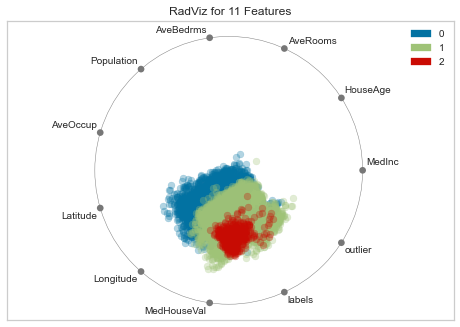

RadialVisualizer(alpha=0.3,
                 ax=<AxesSubplot:title={'center':'RadViz for 11 Features'}>,
                 classes=[0, 1, 2])

In [45]:
from yellowbrick.features.radviz import radviz

# Specify the target classes
classes = [0,1,2]

# Instantiate the visualizer
radviz(housing_df, housing_df['labels'], classes=classes,alpha=0.3)

---
# ANOMALY DETECTION

In [31]:


outlier = LocalOutlierFactor(n_neighbors=20,novelty=False) #outlier vs novelty
scaler = StandardScaler()
X_outlier = scaler.fit_transform(housing_df) # scale X 

outlier_scores = outlier.fit_predict(X_outlier) # predict outliers based on X
housing_df['outlier'] = outlier_scores ==-1 #outliers have a -1 value. closer to 1 is not an outlier. 
housing_df['outlier'] = housing_df['outlier'].apply(lambda x: int(x)) # convert into 1 and 0

In [32]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,labels,outlier
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,1,0
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,0,0
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521,1,0
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,1,0
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422,1,0


<AxesSubplot:xlabel='MedInc', ylabel='MedHouseVal'>

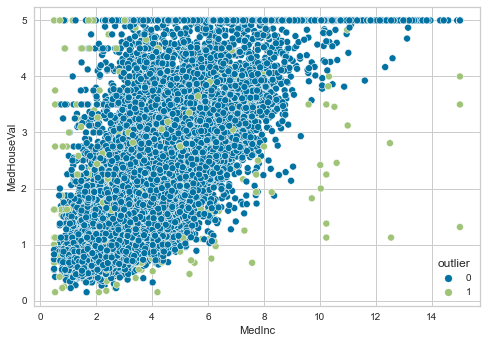

In [33]:
sns.scatterplot(data=housing_df,x=housing_df['MedInc'],y=housing_df['MedHouseVal'],hue=housing_df['outlier'])

# MODEL PROFILING

In [34]:
housing_df[housing_df['outlier']==1].describe().T

,count,mean,std,min,25%,50%,75%,max
MedInc,382.0,3.953422,2.744994,0.499900,1.986450,3.358250,5.245525,15.000100
HouseAge,382.0,30.973822,15.498687,1.000000,19.000000,33.000000,44.000000,52.000000
AveRooms,382.0,7.138973,11.570690,0.846154,3.885166,5.427282,7.283251,141.909091
AveBedrms,382.0,1.528185,2.488302,0.333333,1.000000,1.123533,1.456958,34.066667
Population,382.0,1561.248691,3255.162144,3.000000,99.250000,527.500000,1759.000000,35682.000000
AveOccup,382.0,11.152719,75.794277,0.750000,2.266076,2.913468,3.954375,1243.333333
Latitude,382.0,35.651780,2.184282,32.560000,33.972500,34.555000,37.757500,41.810000
Longitude,382.0,-119.342565,2.191562,-124.150000,-121.380000,-118.815000,-117.750000,-114.490000
MedHouseVal,382.0,2.263619,1.399734,0.149990,1.125000,1.939500,3.262750,5.000010
labels,382.0,0.874346,0.512235,0.000000,1.000000,1.000000,1.000000,2.000000


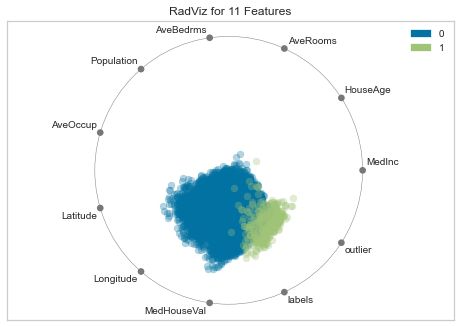

RadialVisualizer(alpha=0.3,
                 ax=<AxesSubplot:title={'center':'RadViz for 11 Features'}>,
                 classes=[0, 1])

In [46]:
from yellowbrick.features.radviz import radviz

# Specify the target classes
classes = [0,1]

# Instantiate the visualizer
radviz(housing_df, housing_df['outlier'], classes=classes,alpha=0.3)

# FINAL INSIGHTS

* houses can be grouped into 3 clusters - smallest is 2.5% of total houses.
* there are houses with outlier features that consist of 1.5% of total houses.

# PERSISTENCE & DEPLOYMENT

In [36]:
pipes[1]

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestregressor', RandomForestRegressor())])

In [37]:
pipes[1].get_params()['randomforestregressor']

RandomForestRegressor()

In [38]:
champion_pipe = pipes[1]

In [39]:
with open('champion_pipe.pkl', 'wb') as handle:
    pickle.dump(champion_pipe, handle)

In [40]:
with open('champion_pipe.pkl', 'rb') as handle:
    loaded_champion_pipe = pickle.load(handle)

In [41]:
loaded_champion_pipe.get_params()['randomforestregressor']

RandomForestRegressor()